In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
#from random import randint
import math
import heapq

In [3]:
A = nx.to_numpy_matrix(G, dtype=np.bool)
#fig = plt.figure(figsize=(5, 5))
#plt.imshow(A,cmap="Greys",interpolation="none")   
sns.heatmap(A, cmap = "Blues")

NameError: name 'G' is not defined

In [ ]:
np.all(A.T==A)

In [4]:
np.average(np.sum(A,1))

NameError: name 'A' is not defined

In [30]:
A=nx.adjacency_matrix(G)

# This is where it starts

In [2]:
clear all

In [24]:
def avalanche(x,A,f,N):

    count = 0
    degree = np.array(np.sum(A,0))[0]
    degree = np.reshape(degree, (N,1))
    xc = np.reshape(degree + (degree==0), (N,1))
    spikes = np.multiply(x>=degree, 1)
    ava = spikes.copy()
    while np.sum(np.multiply(degree,spikes))> 0:
        ava = np.multiply((ava+spikes)>0,1)
        spikes = np.multiply(x>=degree, 1)
        spikes = np.reshape(spikes,(N,1))
        x = x + A*spikes
        x = x - np.multiply(spikes,degree)
        x = x - (np.random.rand(N,1)>f)
        x = np.multiply(x,(x>0))
        count = count + 1

    return [x,ava]

In [25]:
def my_kmax(R,k):
    N = len(R)
    f = np.ravel(R)
    #print(f)
    indices = np.array(heapq.nlargest(k, range(len(f)), f.__getitem__))
    j = np.mod(indices,N)
    i = np.floor(indices/N)
    #print(indices)
    return [i,j]

In [27]:
N = 1000
f = 0.1 #f leak (fraction of leak)
f = 1-f
mean_degree = 4

K = 4
steps = 5000
#tic
np.random.seed(1)
G_undir = nx.erdos_renyi_graph(N,mean_degree/N)

G_dir = nx.DiGraph()
G_dir.add_nodes_from(range(N))

G_dir.add_edges_from(G_undir.edges())


A = nx.to_numpy_matrix(G_dir.to_undirected(), dtype=np.int)

#fig = plt.figure(figsize=(5, 5))
#plt.title("Adjacency Matrix")
#plt.imshow(A,cmap="Greys",interpolation="none")   
#%matplotlib inline
#sns.heatmap(A, cmap="Greys")
#plt.show()

#storex = np.zeros((N,steps))
#storex_noava = np.zeros((N,steps))

temp = np.arange(0,2*G_undir.number_of_edges())
R = [(temp[2*i],temp[2*i+1]) for i in range(G_undir.number_of_edges())]
recency={}
for edge,rec in zip(G_dir.edges(),R):
    recency[edge]=rec

nx.set_edge_attributes(G_dir,"recency",recency)

degree = np.array(np.sum(A,0))[0]
G_undir.clear()
del(R)
del(temp)
del(recency)

In [19]:
f = 0.01

In [32]:
plt.close("all")

In [33]:
#PLOTTING DEG DIST

#degree = list(ele.item(0) for ele in degree)
#temp = np.bincount(degree)
#x_axis = np.arange(0,max(degree)+1)
#plt.ylabel("Frequency")
#plt.xlabel("Degree")
#plt.loglog(x_axis,temp)


In [28]:
#Initial State
x = np.zeros((N,1));
for i in range(N):
    if degree[i]>0:
        np.random.seed(1)
        x[i]=np.random.randint(0,degree[i])
    else:
        x[i]=0
        
xb = x

count = 0
xsave = [0]*steps
for i in range(steps):
    if np.mod(i,steps/100) == 0:
        print(i)
        #print(a)
    
        
    #Particle addition
    
    add_site = np.random.randint(0,N-1)

    x[add_site] = x[add_site] + 1

    #Avalanche processing
    degree = np.array(np.sum(A,0))[0]
    degree = np.reshape(degree, (N,1))
    xc = np.reshape(degree + (degree==0), (N,1))
    spikes = np.multiply(x>=degree, 1)
    ava = spikes.copy()
    temp1 = np.zeros((N,1))
    if np.sum(np.multiply(degree,spikes))>0: 
        [x,temp1] = avalanche(x,A,f,N)
        count = count + 1
    ava = np.multiply((ava+temp1)>0,1)
    #xsave[i] = x
    a = np.sum(ava)
    print(a)
    max_edges=[]
    ##Rewiring
    if a!=0:
        edges=list(G_dir.edges())
        R=[max(G_dir[edge[0]][edge[1]]['recency']) for edge in edges] #takes maximum of the two endpoints for each edge
        indices = np.array(heapq.nlargest(a, range(len(R)), R.__getitem__))
        #print(indices)        
        max_edges=[edges[ind] for ind in indices]

   
    for (ie,je) in max_edges:
        rec=G_dir[ie][je]['recency']
        left_max=rec[0]>rec[1]
        
        fixed_endpoint=(ie,je)[not left_max]
        ne=(add_site,fixed_endpoint)
            
        if (fixed_endpoint != add_site) & (A[add_site,fixed_endpoint]==0): #A is symmetric so it doesn't matter
            dir_cor=(ie,je) in G_dir.edges()
            oe=(ie,je) #oe is old_edge
            
            r=G_dir[oe[0]][oe[1]]['recency'][left_max]
            G_dir.remove_edge(*oe)
            rec=(0,r)

            G_dir.add_edge(*ne,recency=rec)


            A[ie,je] = 0
            A[je,ie] = 0
            A[add_site,fixed_endpoint] = 1
            A[fixed_endpoint,add_site] = 1
    print(np.all(A == nx.to_numpy_matrix(G_dir.to_undirected(), dtype=np.int)))

0
22
True
30
True
32
True
35


/home/kabir/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index


True
27
True
25
True
25
True
25
True
25
True
25
True
27
True
27
True
28
True
28
True
27
True
28
True
27
True
28
True
28
True
29
True
30
True
29
True
30
True
29
True
28
True
29
True
31
True
31
True
32
True
33
True
33
True
35
True
33
True
35
True
34
True
34
True
36
True
39
True
39
True
39
True
39
True
39
True
42
True
42
True
44
True
46
True
52
True
51
True
52
True
55
True
50
55
True
57
True
59
True
64
True
68
True
74
True
75
True
79
True
83
True
89
True
92
True
96
True
98
True
105
True
114
True
125
True
127
True
139
True
150
True
158
True
175
True
188
True
209
True
224
True
231
True
237
True
241
True
240
True
241
True
242
True
243
True
243
True
243
True
246
True
244
True
245
True
245
True
245
True
245
True
246
True
246
True
246
True
245
True
245
True
245
True
245
True
245
True
245
True
245
True
244
True
100
245
True
246
True
245
True
245
True
245
True
246
True
245
True
244
True
246
True
246
True
245
True
245
True
246
True
245
True
246
True
245
True
246
True
245
True
244
True
244
True
246

True
244
True
246
True
245
True
244
True
245
True
245
True
245
True
246
True
246
True
245
True
245
True
245
True
245
True
245
True
245
True
245
True
246
True
245
True
245
True
245
True
246
True
245
True
244
True
244
True
245
True
244
True
244
True
244
True
245
True
245
True
244
True
245
True
245
True
245
True
245
True
245
True
950
245
True
244
True
245
True
245
True
245
True
244
True
244
True
245
True
245
True
245
True
245
True
245
True
246
True
245
True
244
True
245
True
245
True
245
True
245
True
244
True
245
True
245
True
245
True
245
True
245
True
245
True
245
True
244
True
244
True
244
True
244
True
245
True
245
True
245
True
245
True
244
True
245
True
246
True
245
True
245
True
246
True
244
True
244
True
244
True
245
True
244
True
244
True
244
True
245
True
245
True
1000
245
True
245
True
244
True
244
True
244
True
245
True
244
True
244
True
245
True
244
True
244
True
245
True
245
True
245
True
247
True
245
True
245
True
245
True
245
True
245
True
246
True
245
True
245
True
245
T

True
245
True
245
True
246
True
245
True
246
True
245
True
244
True
244
True
245
True
244
True
244
True
244
True
244
True
244
True
245
True
245
True
244
True
244
True
244
True
245
True
244
True
244
True
244
True
244
True
244
True
245
True
245
True
244
True
244
True
245
True
245
True
245
True
244
True
244
True
1850
245
True
245
True
245
True
245
True
245
True
244
True
244
True
244
True
244
True
246
True
245
True
244
True
244
True
244
True
244
True
244
True
244
True
245
True
244
True
244
True
245
True
246
True
245
True
245
True
244
True
245
True
246
True
245
True
245
True
246
True
245
True
245
True
244
True
244
True
244
True
245
True
244
True
244
True
244
True
244
True
245
True
245
True
245
True
245
True
246
True
246
True
245
True
246
True
246
True
246
True
1900
246
True
246
True
245
True
246
True
245
True
245
True
244
True
244
True
245
True
245
True
244
True
244
True
244
True
244
True
244
True
246
True
245
True
246
True
245
True
245
True
244
True
245
True
246
True
246
True
245
True
245


True
245
True
244
True
244
True
244
True
244
True
244
True
244
True
244
True
244
True
246
True
244
True
244
True
244
True
245
True
245
True
244
True
244
True
244
True
244
True
244
True
244
True
245
True
244
True
244
True
244
True
244
True
244
True
244
True
245
True
246
True
245
True
245
True
245
True
2750
245
True
244
True
244
True
244
True
244
True
244
True
244
True
245
True
245
True
244
True
244
True
245
True
245
True
245
True
245
True
245
True
246
True
246
True
245
True
245
True
246
True
246
True
246
True
245
True
246
True
245
True
246
True
245
True
245
True
245
True
246
True
245
True
244
True
244
True
244
True
245
True
245
True
244
True
244
True
245
True
244
True
244
True
245
True
244
True
244
True
244
True
244
True
244
True
245
True
245
True
2800
245
True
245
True
244
True
244
True
245
True
244
True
244
True
244
True
245
True
245
True
244
True
245
True
245
True
245
True
245
True
245
True
245
True
245
True
245
True
244
True
244
True
245
True
245
True
244
True
244
True
245
True
244


True
244
True
244
True
244
True
244
True
244
True
244
True
244
True
246
True
245
True
244
True
245
True
245
True
244
True
244
True
244
True
244
True
245
True
245
True
244
True
245
True
246
True
245
True
245
True
244
True
244
True
245
True
245
True
244
True
244
True
244
True
244
True
244
True
3650
244
True
244
True
244
True
244
True
244
True
244
True
244
True
245
True
245
True
244
True
246
True
246
True
245
True
246
True
245
True
245
True
245
True
245
True
245
True
245
True
246
True
246
True
245
True
245
True
246
True
244
True
244
True
245
True
244
True
245
True
244
True
246
True
245
True
245
True
245
True
245
True
246
True
245
True
244
True
244
True
245
True
246
True
245
True
245
True
245
True
245
True
245
True
245
True
244
True
244
True
3700
245
True
245
True
244
True
244
True
245
True
245
True
244
True
244
True
245
True
245
True
245
True
245
True
244
True
244
True
244
True
244
True
245
True
245
True
245
True
245
True
245
True
246
True
245
True
246
True
246
True
246
True
245
True
245


True
245
True
245
True
244
True
244
True
244
True
245
True
245
True
245
True
245
True
246
True
246
True
246
True
246
True
245
True
244
True
245
True
244
True
244
True
245
True
245
True
245
True
244
True
244
True
245
True
245
True
245
True
244
True
244
True
245
True
245
True
4550
245
True
244
True
244
True
245
True
245
True
245
True
245
True
244
True
244
True
245
True
246
True
245
True
245
True
245
True
244
True
244
True
244
True
244
True
244
True
244
True
244
True
244
True
244
True
245
True
244
True
245
True
244
True
244
True
244
True
244
True
244
True
244
True
244
True
244
True
245
True
244
True
245
True
244
True
244
True
244
True
245
True
244
True
244
True
245
True
244
True
244
True
245
True
245
True
245
True
245
True
4600
244
True
244
True
244
True
244
True
244
True
244
True
244
True
244
True
244
True
244
True
244
True
245
True
244
True
244
True
244
True
244
True
244
True
244
True
244
True
246
True
246
True
246
True
245
True
244
True
244
True
244
True
244
True
245
True
245
True
245


In [ ]:
%matplotlib inline


temp = np.bincount(list(degree.flat))
x_axis = np.arange(0,max(degree)+1)
plt.ylabel("Frequency")
plt.xlabel("Degree")

plt.scatter(x_axis,temp)
plt.plot(x_axis,temp)
plt.xscale('log')
plt.yscale('log')
plt.show()

In [21]:
degree = np.array(np.sum(A,0))[0]

In [72]:
np.count_nonzero(A)

2006

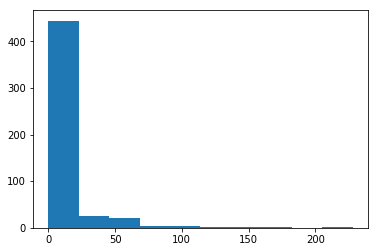

In [94]:
import matplotlib.pyplot as plt
import networkx as nx

def plot_degree_dist(G):
    degrees = [G.degree(n) for n in G.nodes()]
    plt.hist(degrees)
    plt.show()

plot_degree_dist(nx.DiGraph(A))

In [79]:
degrees = [G.degree(n) for n in G.nodes()]
len(degrees)

500

In [9]:
degree.shape

(100, 1)

In [134]:
max(degrees)+1

12

In [115]:
np.where(np.array(degrees) == 2)[0].shape

(70,)

In [112]:
temp

array([  6,  38,  70, 101, 109,  71,  51,  26,  15,   5,   7,   1], dtype=int64)

In [316]:
# rewiring 
R = np.multiply(R,A)
Ruse = R
for c1 in range(N):
    for c2 in range(N):
        if Ruse[c1,c2] <= Ruse[c2,c1]:
            Ruse[c1,c2] = -1
        else:
            Ruse[c2,c1] = -1
            
            
B = np.array(np.ndarray.flatten(Ruse))
B = np.transpose(B)

indices = np.argpartition(B.transpose()[0], -a)[-a:] # maxk function


v = indices
ie = np.floor((v-1)/N) 
je = np.fmod(v,N) - 1
for vv in range(a):
    if v[vv] == 0:
        je[vv] = 0

for j in range(a):
    if (je[j] != add_site) & (A[int(ie[j]),int(je[j])]) != 0 & (A[add_site,je[j]] == 0):
        A[int(ie[j]),int(je[j])] = 0
        A[int(je[j]),int(ie[j])] = 0
        
        A[add_site,je[j]] = 1
        A[je[j],add_site] = 1
        
        R = np.multiply((R+1),A)
    

In [321]:
for j in range(a):
    if (je[j] != add_site) & (A[int(ie[j]),int(je[j])]) != 0 & (A[add_site,je[j]] == 0):
        A[int(ie[j]),int(je[j])] = 0
        A[int(je[j]),int(ie[j])] = 0
        
        A[add_site,je[j]] = 1
        A[je[j],add_site] = 1
        
        R = np.multiply((R+1),A)
    

In [317]:
j = 
(je[j] != add_site) & (A[int(ie[j]-1),int(je[j]-1)]) != 0 & (A[add_site,je[j]] == 0)

False

In [310]:
(je[j] != add_site)

True

In [315]:
a = 10

In [322]:
R

matrix([[  0,   1,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0,
           1,   0,   0,   0,   0,   0,   0],
        [  2,   0,   0,   0,   0,   0,   0,   1,   1,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   1],
        [  0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   1,   0,   1,   0,   0,   0,   1,   0,   1,
           0,   0,   0,   1,   0,   0,   0],
        [  0,   0,   0,  85,   0,   1,   0,   0,   1,   0,   0,   1,   0,
           0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0, 106,   0,   1,   0,   0,   0,   0,   0,   0,
           1,   1,   0,   0,   0,   0,   0],
        [122,   0,   0, 125,   0, 127,   0,   1,   0,   1,   0,   0,   1,
           0,   0,   0,   0,   0,   0,   1],
        [  0, 143, 144,   0,   0,   0, 148,   0,   0,   0,   0,   0,   0,
           0,   0,   1,   0,   0,   0,   0],
        [  0,   1,   0,   0, 166,   0,   0,   0,

In [289]:
je = np.fmod(v,N) - 1
for vv in range(a):
    if v[vv] == 0:
        je[vv] = 0
    else:    
        je[vv] = je[vv] + N

In [303]:
je = np.fmod(v,N) - 1

In [306]:
je

array([ 7,  8, 16])

In [286]:
vv=0
v[vv] == -1

False

In [195]:
je = je + np.multiply(N,np.multiply(je==0,1))

In [129]:
y = np.array([1,2,10, 110 ,1,1,1,2,3,4,5,6])
n = 1
print(np.argsort(y)[-n:])
y[np.argsort(y)[-n:]]

[3]


array([110])

In [122]:
ind = np.argpartition(y, -n)[-n:]

In [125]:
ind

array([ 9, 10, 11,  2,  3])

In [127]:
a

1

In [34]:
a = np.sum(ava)i

SyntaxError: invalid syntax (<ipython-input-34-e26a7d5cbfb8>, line 1)

array([[[1., 1., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 2., 2., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 1., 1., ..., 0., 0., 0.],
        [1., 1., 1., ..., 1., 1., 0.]]])

In [474]:
%matplotlib
plt.plot(np.reshape(xsave, (10000, 20))[-200:,:], linewidth = 10)

Using matplotlib backend: Qt5Agg


ValueError: cannot reshape array of size 5000 into shape (10000,20)

In [59]:
degree

array([[3],
       [2],
       [1],
       [5],
       [4],
       [4],
       [7],
       [4],
       [3],
       [3],
       [4],
       [4],
       [4],
       [3],
       [5],
       [3],
       [2],
       [2],
       [1],
       [6]])

In [14]:
#Initial State
x=np.zeros((N,1));
for i in range(N):
    if degree[i]>0:
        x[i]=np.random.randint(0,degree[i])
    else:
        x[i]=0
        
##Particle addition
xb = x
add_site = np.random.randint(0,N-1)
x[add_site] = x[add_site] + 1
print(x.shape)
        
count = 1
degree = np.array(np.sum(A,0))[0]
x_critical = degree + (degree==0)
spikes = (x>=x_critical)
ava = spikes

(500, 1)


(10, 1)


In [59]:
#Avalanche processing
degree = np.array(np.sum(A,0))[0]
spikes = np.zeros((N,1))
xc = degree + (degree==0)
spikes[np.where(x>=xc)[0]] = 1
ava = spikes
temp1 = np.zeros((N,1))

(10, 1)

In [ ]:
if np.sum(np.multiply(degree,spikes)) > 0: 
    count = 0
    degree = np.array(np.sum(A,0))[0]
    x_critical = degree + (degree==0)
    spikes = (x>=x_critical)
    ava = spikes
    while np.sum(np.multiply(degree,spikes))>0:
        ava = np.multiply(((ava + spikes)>0),1)
        spikes = np.multiply((x>=degree),1)
        spikes = np.reshape(spikes.transpose(), (10,1))

        x = x + A*spikes
        x = x - np.multiply(spikes,degree)
        x = x - (np.random.rand(N,1)>f)
        x = np.multiply(x,(x>0))
    #storextemp(:,count)=x;
        count = count+1
        #count = count + 1

#ava=(ava+temp1)>0;
#a=sum(ava);

In [62]:
x

array([[2.],
       [1.],
       [4.],
       [2.],
       [0.],
       [1.],
       [3.],
       [2.],
       [0.],
       [4.]])

In [91]:
count = 0
degree = np.array(np.sum(A,0))[0]
degree = np.reshape(degree, (N,1))
xc = np.reshape(degree + (degree==0), (N,1))
spikes = np.multiply(x>=xc, 1)
ava = spikes
while np.sum(np.multiply(degree,spikes))> 0:
    ava = np.multiply((ava+spikes)>0,1)
    spikes = np.multiply(x>=degree, 1)
    spikes = np.reshape(spikes,(N,1))
    x = x + A*spikes
    x = x - np.multiply(spikes,degree)
    x = x - (np.random.rand(N,1)>f)
    x = np.multiply(x,(x>0))
    count = count + 1

In [94]:
spikes[1] = 1

In [92]:
count

0

In [88]:
np.sum(np.multiply(degree,spikes))

0

In [72]:
x

array([[2.],
       [2.],
       [1.],
       [2.],
       [0.],
       [6.],
       [1.],
       [2.],
       [0.],
       [1.]])

10

In [361]:
spikes

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [93]:
x

array([1, 2])

In [97]:
a=np.array([[10,0],[1,10]])
np.dot(a,np.array([5,0]))

array([50,  5])